In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [353]:
from sklearn.datasets import make_moons

In [354]:
X,y = make_moons(
                    n_samples=1000,
                    noise = 0.095,
                    shuffle = True
)

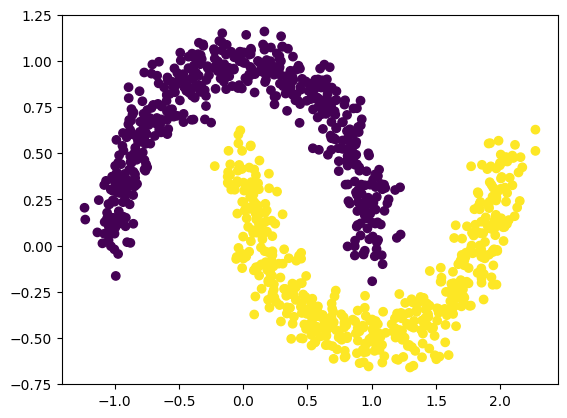

In [355]:
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y
)
plt.show()

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
X[:11]

array([[-0.39153015,  0.90442993],
       [ 1.30737985, -0.43891064],
       [ 1.23578209, -0.46092154],
       [ 1.50835219, -0.3399212 ],
       [ 0.88328932,  0.1028771 ],
       [ 0.87756746,  0.28853195],
       [-0.09238116,  1.0501097 ],
       [ 0.70470244, -0.41568222],
       [ 1.22767206, -0.36485839],
       [ 0.83761195,  0.6099068 ],
       [-0.88294599,  0.22344256]])

In [358]:
X = StandardScaler().fit_transform(X)

In [359]:
X[:11]

array([[-1.01933864,  1.31328885],
       [ 0.92240513, -1.37508209],
       [ 0.84057354, -1.41913157],
       [ 1.15210346, -1.17697869],
       [ 0.4376972 , -0.29082509],
       [ 0.43115749,  0.08071814],
       [-0.67743079,  1.60483164],
       [ 0.233584  , -1.32859603],
       [ 0.83130431, -1.22688444],
       [ 0.38549093,  0.7238721 ],
       [-1.58099503, -0.04954252]])

In [360]:
from sklearn.cluster import DBSCAN

In [361]:
dbs = DBSCAN(
                eps = 0.2, # Really highly hyper sensitive parameter.
                min_samples = 5,
                metric = "euclidean"
)

In [362]:
y_pred = dbs.fit_predict(X)

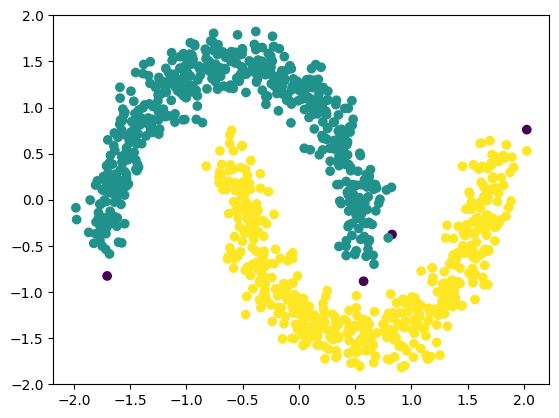

In [363]:
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y_pred
)
plt.show()

In [364]:
from sklearn.datasets import make_circles

In [365]:
X,y = make_circles(
    n_samples = 500,
    noise = 0.05,
    factor = 0.55,
)


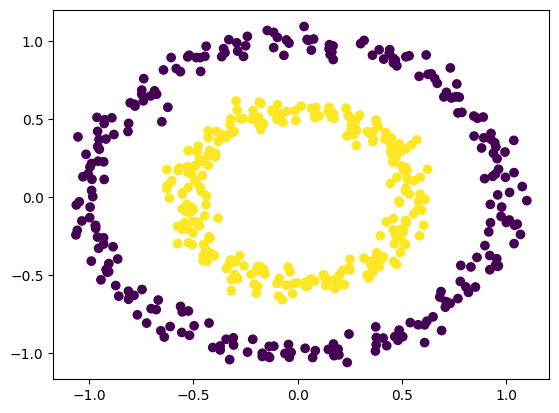

In [366]:
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y
)
plt.show()

In [367]:
X[:11]

array([[-0.19083131, -0.57361831],
       [ 0.99450089,  0.28851133],
       [ 0.34078189, -0.51949108],
       [ 0.91662669, -0.22375455],
       [-0.66914419, -0.66108384],
       [ 0.4860689 , -0.2126274 ],
       [-0.18221995, -0.44513083],
       [ 0.35879964,  0.91013809],
       [ 0.47559108,  0.84171241],
       [ 0.30188694,  0.98443541],
       [-0.90701962, -0.47834703]])

In [368]:
X = StandardScaler().fit_transform(X)

In [369]:
X[:11]

array([[-0.32759841, -0.9994452 ],
       [ 1.74102529,  0.50145115],
       [ 0.60016486, -0.90521417],
       [ 1.60512041, -0.39036134],
       [-1.16234274, -1.15171545],
       [ 0.85371753, -0.37098989],
       [-0.31257   , -0.77575913],
       [ 0.63160914,  1.58365189],
       [ 0.83543179,  1.46452845],
       [ 0.53228597,  1.71299737],
       [-1.57747933, -0.83358579]])

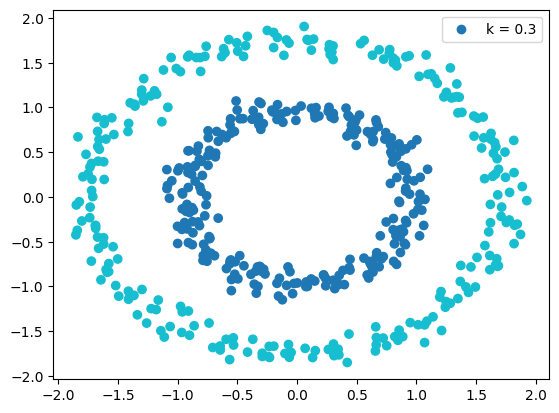

In [390]:
dbs = DBSCAN(
    eps =  0.3, #0.2125
    min_samples = 5
)

y_pred = dbs.fit_predict(X)

plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    cmap = 'tab10',
    label = f'k = {dbs.eps}'
)
plt.legend()
plt.show()

In [371]:
from sklearn.neighbors import NearestNeighbors

In [372]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [373]:
neighbors_fit = nbrs.fit(X)

In [374]:
distances,indices = nbrs.kneighbors(X)

In [375]:
min_distances = np.sort(distances[:,4],axis=0)

In [380]:
min_distances[:10]

array([0.04318176, 0.04588363, 0.04793406, 0.04932329, 0.05364997,
       0.05434795, 0.05514045, 0.05606426, 0.05685258, 0.05815764])

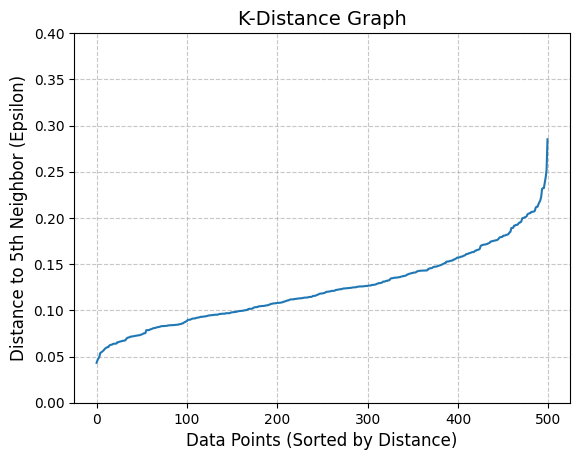

In [377]:
plt.title("K-Distance Graph", fontsize=14)
plt.xlabel("Data Points (Sorted by Distance)", fontsize=12)
plt.ylabel(f"Distance to {5}th Neighbor (Epsilon)", fontsize=12)
plt.plot(min_distances)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0,0.4)
plt.show()

In [ ]:
# # OPTICS Algorithm

# from sklearn.cluster import OPTICS

# clust = OPTICS(min_samples=5,metric='euclidean')
# clust.fit(X)

# # 2. Extract reachability distances and processing order
# reachability = clust.reachability_[clust.ordering_]
# labels = clust.labels_[clust.ordering_]

# # 3. Plot the Reachability Plot
# plt.figure(figsize=(10, 7))
# plt.bar(range(len(reachability)), reachability, color='gray', alpha=0.5)
# plt.title("OPTICS Reachability Plot (Valleys = Clusters)")
# plt.ylabel("Reachability Distance")
# plt.xlabel("Points in Processing Order")
# plt.show()